In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./data/loan.csv', header=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Write your code below:

In [ ]:
#Colabで実行するための処理
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/My Drive/MICIN/data/loan.csv', header=0)
train.head()

#Loan_ID: ID
#Gender: 性別
#Married: Yes(既婚)/No(未婚)
#Dependents: 扶養家族の人数（3人以上からは3+と表記)
#Education: ここでは大学だと解釈する。
#Self_Employed: 個人事業主か否か
#ApplicantIncome: 申請者の収入
#CoapplicantIncome: 共同申請者の収入
#LoanAmount: 借入金額
#Loan_Amount_Term: 借入期間(Dayと考える)
#Credit_History: 信用履歴。１でクレジットヒストリーあり、0でなし。（アメリカにおいてはクレジットヒストリーがないといくら現金を持っていても信用してもらえずアパートの部屋が借りれないということもあるらしい。）
#Property_Area:出身地。Urban(都市)/Rural(農村)/Semiurban(半都市)
#Loan_Status: 目的変数。融資した資金が実際に回収できたかどうか。

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#データ前処理・どういう手法を使って欠損値を扱っていくか判断するためにまずはデータの構造などを確認する。

#データサイズ確認
print('Data Size', train.shape)

Data Size (614, 13)


----------------------------------------------------------------------------------------------------
col :  Loan_ID


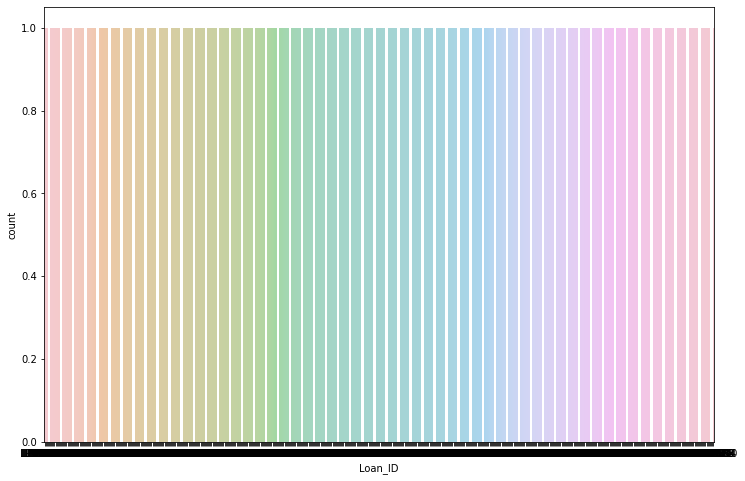

----------------------------------------------------------------------------------------------------
col :  Gender


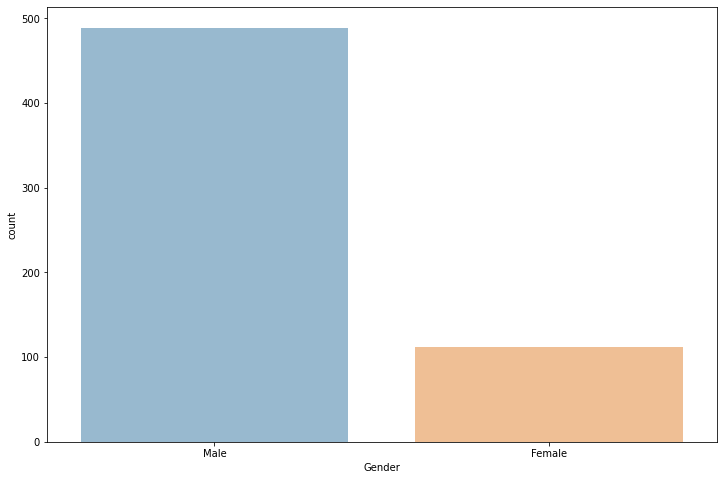

----------------------------------------------------------------------------------------------------
col :  Married


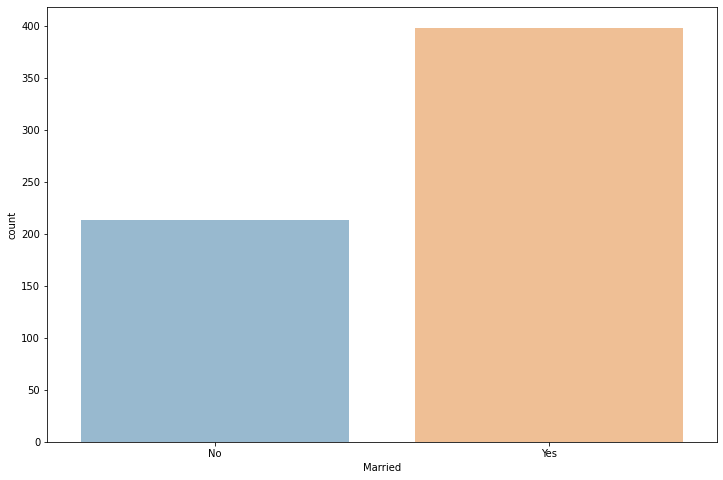

----------------------------------------------------------------------------------------------------
col :  Dependents


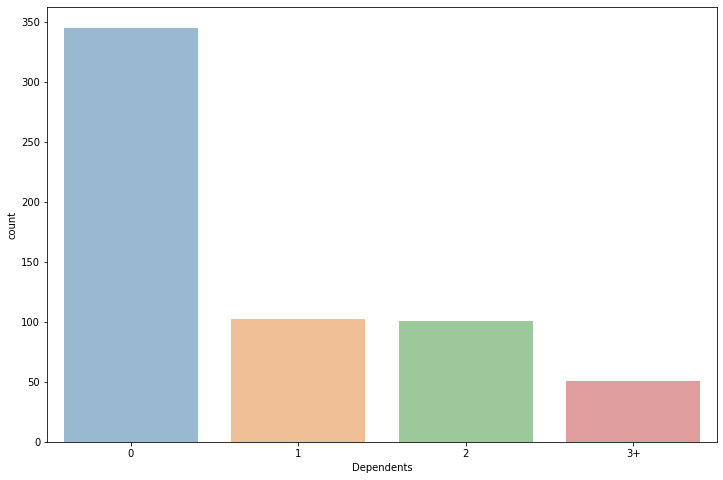

----------------------------------------------------------------------------------------------------
col :  Education


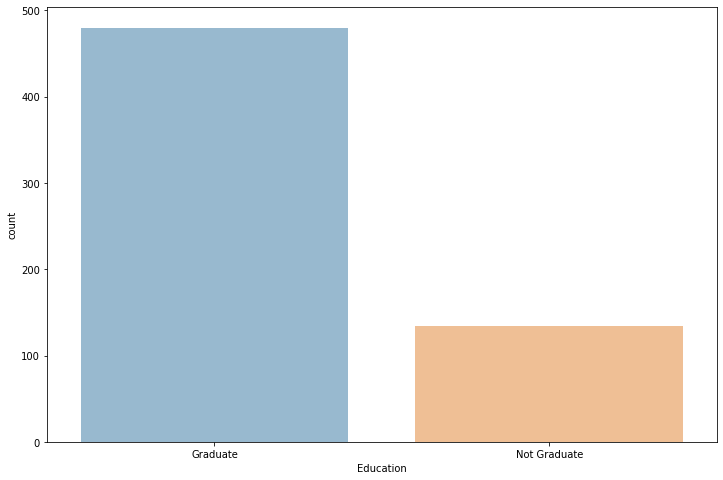

----------------------------------------------------------------------------------------------------
col :  Self_Employed


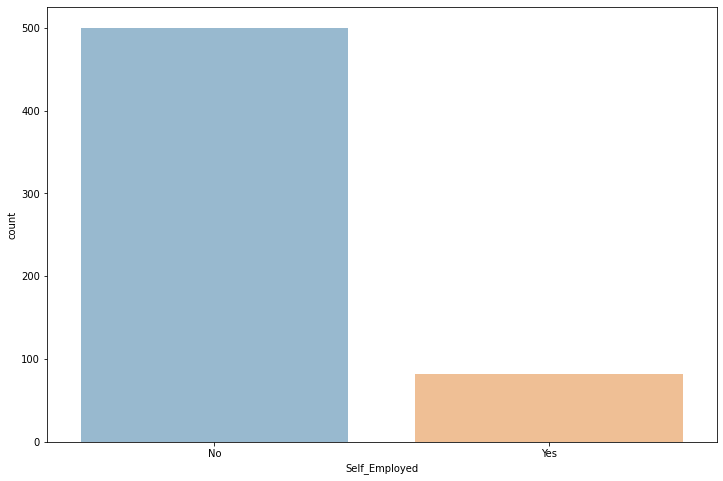

----------------------------------------------------------------------------------------------------
col :  ApplicantIncome


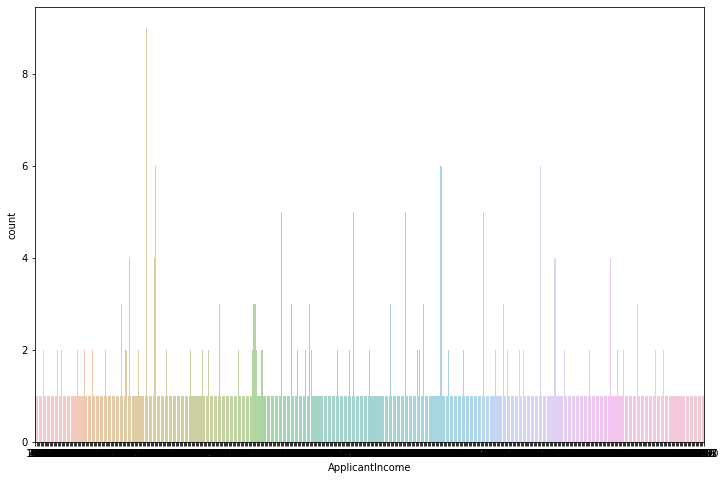

----------------------------------------------------------------------------------------------------
col :  CoapplicantIncome


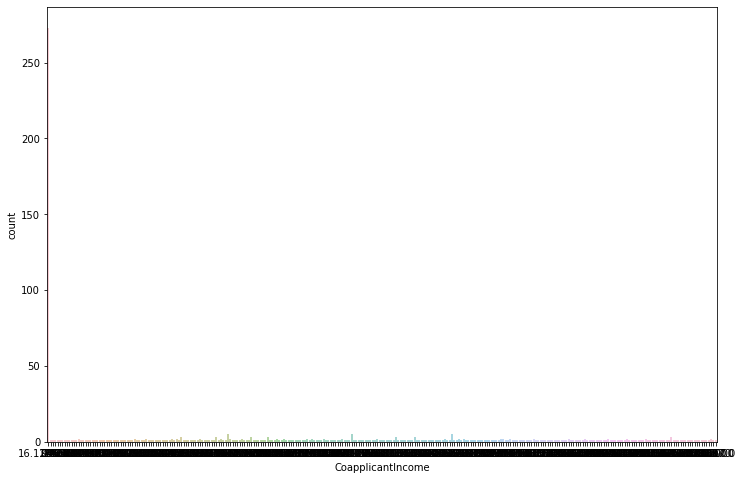

----------------------------------------------------------------------------------------------------
col :  LoanAmount


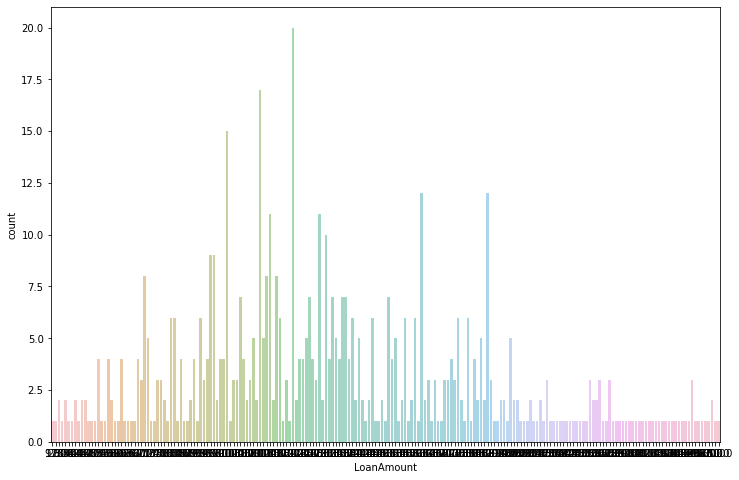

----------------------------------------------------------------------------------------------------
col :  Loan_Amount_Term


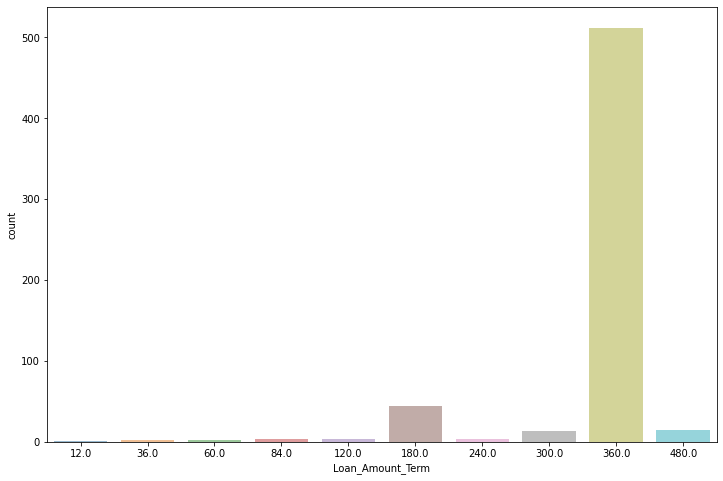

----------------------------------------------------------------------------------------------------
col :  Credit_History


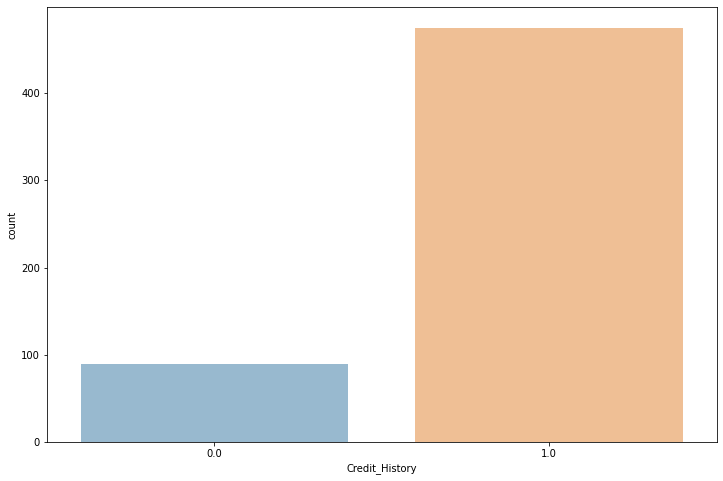

----------------------------------------------------------------------------------------------------
col :  Property_Area


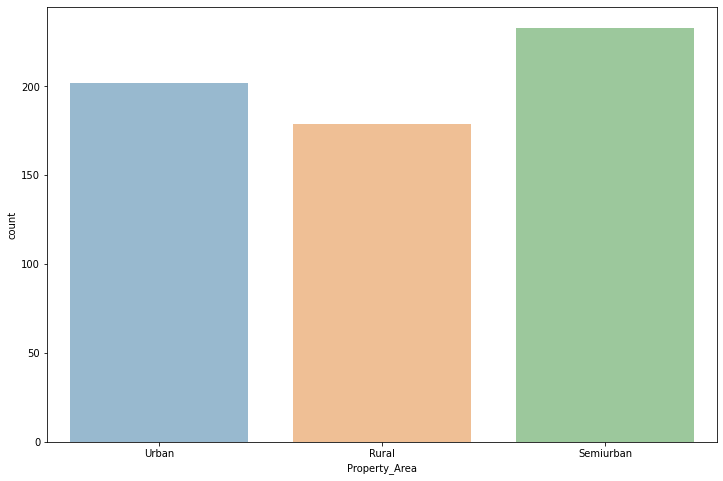

----------------------------------------------------------------------------------------------------
col :  Loan_Status


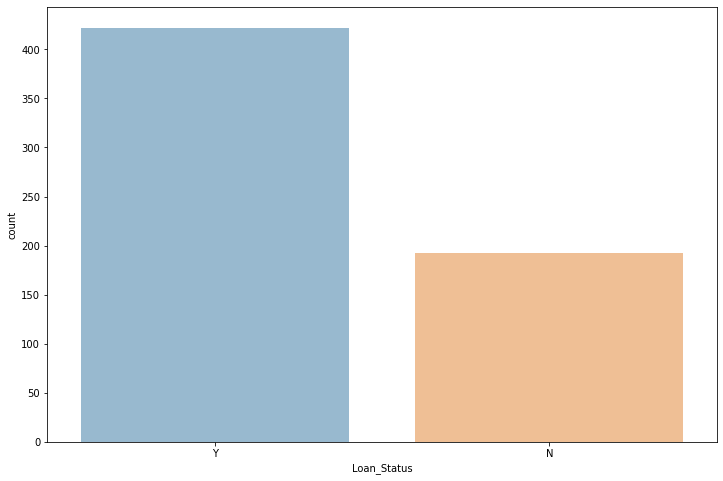

In [ ]:
#データの可視化
%matplotlib inline

for col in train.columns:
    print('-' * 100)
    print('col : ', col)
    f, ax = plt.subplots(figsize=(12, 8))
    sns.countplot(x=col, data=train, alpha=0.5)
    plt.show()

In [ ]:
#基本統計情報の確認
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
cat_cols = [col for col in train.columns if train[col].dtype in ['O']]
train[cat_cols].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001947,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
#それぞれの欠損値の数を確認
null_info_df = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)).head(20).rename(columns={0:'null_count'})
null_info_df['null_percent(%)'] = null_info_df['null_count']/len(train) * 100
null_info_df

,null_count,null_percent(%)
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


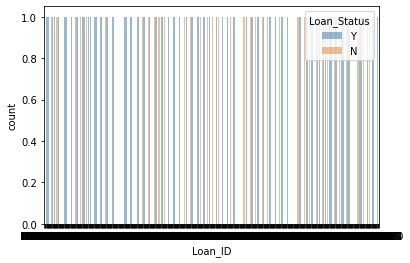

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


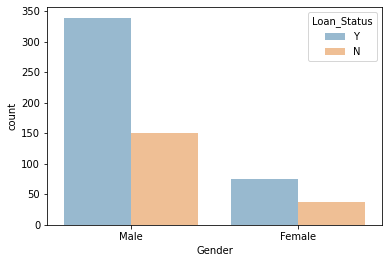

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


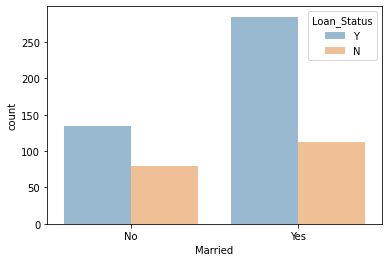

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


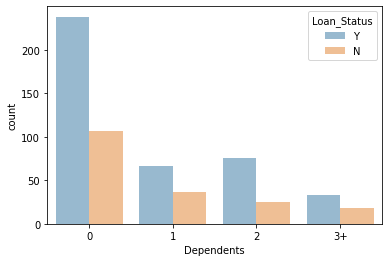

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


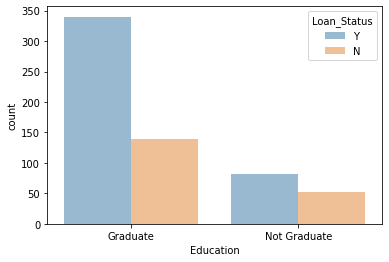

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


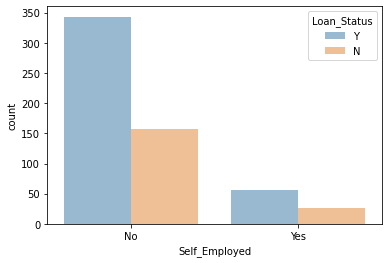

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


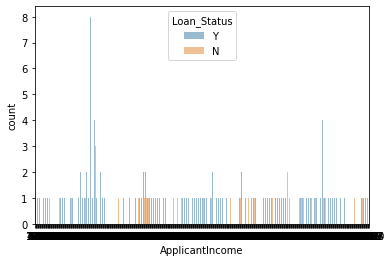

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


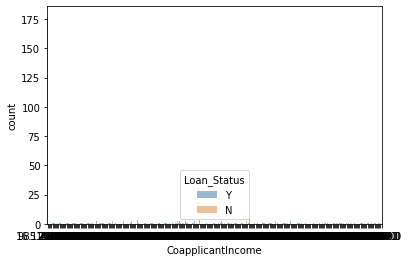

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


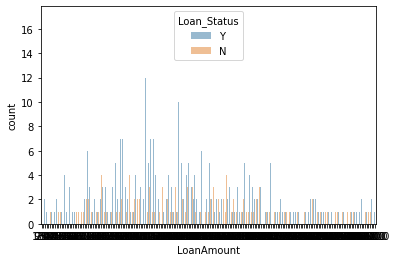

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


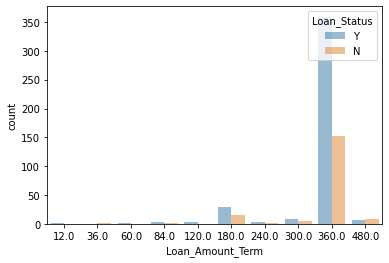

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


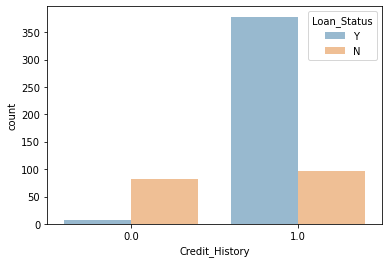

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


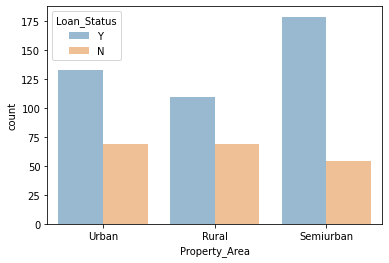

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


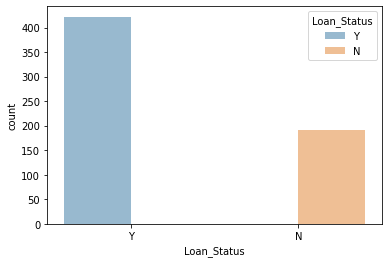

In [ ]:
#それぞれの特徴量ごとの資金回収率を見る
for col in train.columns:
    sns.countplot(train[col], hue=train['Loan_Status'], alpha=0.5)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


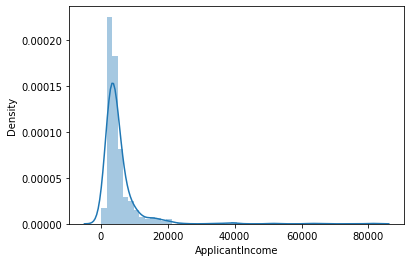

In [ ]:
#ApplicantIncome(申請者の収入)の分布を見てみる
sns.distplot(train['ApplicantIncome'])
plt.show()

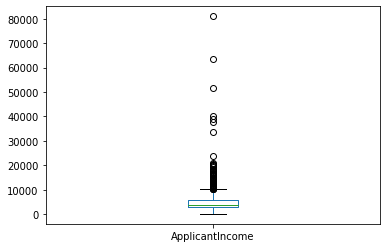

In [ ]:
#箱ひげ図を使って外れ値を見てみる。
train['ApplicantIncome'].plot.box()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


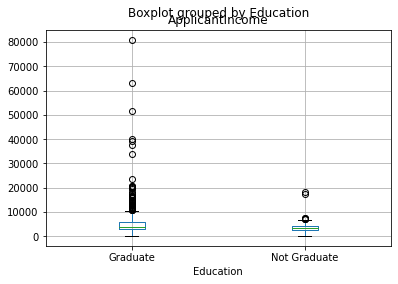

In [ ]:
#外れ値が多くあることを確認した。
#収入に差があるのは学歴による差だと思われる(参考: https://www.mhlw.go.jp/toukei/itiran/roudou/chingin/kouzou/z2018/dl/03.pdf)ので大卒かそれ以外かで収入の分布を再度見てみる。

train.boxplot(column='ApplicantIncome', by='Education')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


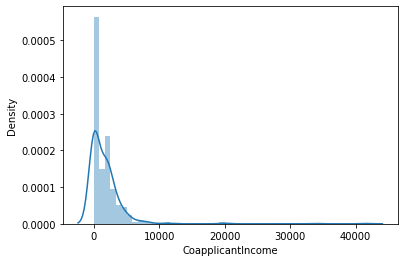

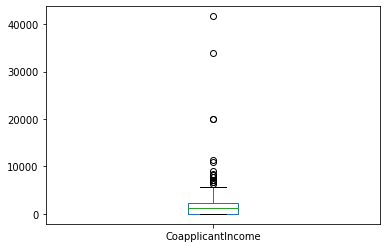

In [ ]:
#次にCoappalicantIncome(共同申請者の収入)を見てみる。
#申請者にくらべて収入の外れ値が少ない。
sns.distplot(train['CoapplicantIncome'])
plt.show()

train['CoapplicantIncome'].plot.box()
plt.show()

In [ ]:
#オブジェクト変数をカテゴリ変数に変換
def categorize(x):
    object_columns = x.select_dtypes(include='object').columns
    x[object_columns] = x[object_columns].astype('category')
categorize(train)

In [ ]:
#カテゴリ変数を数値に変換する。
from sklearn.preprocessing import LabelEncoder

train['Property_Area'] = pd.get_dummies(train['Property_Area'])

def encode_cat(df,cols):
    for col in cols:
        LE = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = pd.Series(LE.fit_transform(not_null), index=not_null.index)
    return df

train_arrange = encode_cat(train,cols=['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status', 'Dependents'])

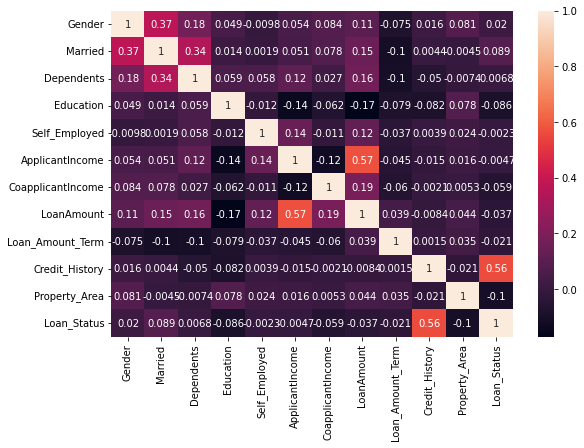

In [ ]:
#それぞれの特徴量の相関関係を見てみる。

#LoanAmountとApplocantIncomeの相関係数が高い。
#MarriedとGenderの相関関係が高い。
#Credit_Hisotryと目的変数のLoan_Statusとの相関関係が高い。Credit_Hisotryの欠損値は１番多いのもあり、慎重に欠損値を補完する必要がある。

plt.figure(figsize=(9, 6))
sns.heatmap(train_arrange.corr(), annot=True)

In [ ]:
#Gender、Married、Dependents、Loan_Amount_Termは欠損値が少ないこともあり、中央値で欠損値補完する
#Self_Employedも相関係数がそれほど高い特徴量がないこともあり中央値で補完する
for col in ['Gender', 'Married', 'Dependents', 'Loan_Amount_Term', 'Self_Employed']:
    train_arrange[col] = train_arrange[col].fillna(train_arrange[col].median())

In [ ]:
#LoanAmountを相関係数の高い、Married、Dependents、Self_Employed、ApplicantIncome、CoapplicantIncomeを利用して欠損値補完することにする。
from sklearn.ensemble import RandomForestRegressor
import copy

loan_train = train_arrange[['LoanAmount', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome']]
#loan_train = train_arrange[['LoanAmount', 'ApplicantIncome']]
loan_train_x = loan_train.drop(['LoanAmount'], axis=1)
loan_train_y = loan_train['LoanAmount'].notnull()

rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=1)
rfr.fit(loan_train_x, loan_train_y)

unknown_loan = loan_train[loan_train.LoanAmount.isnull()].values
predictedLoanAmount = rfr.predict(unknown_loan[:,1::])

train_arrange.loc[(train_arrange.LoanAmount.isnull()), 'LoanAmount'] = predictedLoanAmount

In [ ]:
credits = copy.copy(train_arrange)

#credit['Credit_History'] = credit['Credit_History'].fillna(credit['Credit_History'].median())

In [ ]:
#Credit_Hisotryを相関係数が高いLoan_Statusを使って補完する

credit_train = credits[['Credit_History', 'Loan_Status']]
credit_train_x = credit_train.drop(['Credit_History'], axis=1)
credit_train_y = credit_train['Credit_History'].notnull()

rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=1)
rfr.fit(credit_train_x, credit_train_y)

unknown_loa = credit_train[credit_train.Credit_History.isnull()].values
predictedCredit = rfr.predict(unknown_loa[:,1::])

train_arrange.loc[(train_arrange.Credit_History.isnull()), 'Credit_History'] = predictedCredit

In [ ]:
#欠損値がないことを確認
train_arrange.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

train = copy.copy(train_arrange.drop(columns='Loan_ID'))
target = 'Loan_Status'

loan_data = train
loan_target = train[target]

In [ ]:
#xgboostを利用して学習してみる。
#データ数が614件と少ないと感じるのでテストデータは少し多めに取って50%使用する
train_x, test_x, train_y, test_y = train_test_split(loan_data, loan_target, test_size=0.5, random_state=42, shuffle=True)

train_set = xgb.DMatrix(train_x, train_y)
test_set = xgb.DMatrix(test_x, test_y)

params={
    'max_depth': 2,
    'eta': 0.9,
    'objective': 'multi:softmax',
    'num_class': 3
}

model = xgb.train(
    params = params,
    dtrain = train_set,
    evals = [(train_set, "train"), (test_set, "valid")]
)

pred = model.predict(xgb.DMatrix(test_x))

score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

[0]	train-merror:0.185668	valid-merror:0.19544
[1]	train-merror:0.185668	valid-merror:0.19544
[2]	train-merror:0.179153	valid-merror:0.192182
[3]	train-merror:0.179153	valid-merror:0.201954
[4]	train-merror:0.175896	valid-merror:0.201954
[5]	train-merror:0.166124	valid-merror:0.208469
[6]	train-merror:0.156352	valid-merror:0.208469
[7]	train-merror:0.143322	valid-merror:0.221498
[8]	train-merror:0.130293	valid-merror:0.23127
[9]	train-merror:0.130293	valid-merror:0.2443
score:0.7557


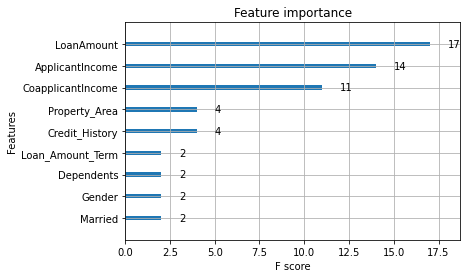

In [ ]:
#どの特徴量が結果に寄与したのか見てみる。

xgb.plot_importance(model)

#上位3つのうち2つは欠損値はなし、LoanAmountは欠損値が22件あるが、
#Married, Dependents, Self_Employed, ApplicantIncome, CoapplicantIncomeの特徴量で予測してみたり、
#１番相関係数の高いApplicantIncomeのみで予測してみたり、他の特徴量を使わず中央値などで補完してみたが精度に大きな差はなかった。(小数点3桁まで)
#なので、xgboostではなく手法を使ってみる。

In [ ]:
#ロジスティック回帰でモデルを作成してみる。

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

train = copy.copy(train_arrange.drop(columns='Loan_ID'))
target = 'Loan_Status'
loan_data = train.drop(columns=target)
loan_target = train[target]

#データ数が614件と少ないと感じるのでテストデータは少し多めに取って40%使用する
train_x, test_x, train_y, test_y = train_test_split(loan_data, loan_target,test_size=0.4, random_state=42, shuffle=True)
logreg = LogisticRegression(solver='liblinear').fit(train_x, train_y)

#交差検証
scores = cross_val_score(logreg, loan_data, loan_target, cv=10)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.80645161 0.82258065 0.75806452 0.75806452 0.78688525 0.78688525
 0.85245902 0.85245902 0.80327869 0.83606557]
Average score: 0.8063194077207825


In [ ]:
#ランダムフォレストを使ってモデルを作成してみる。
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

select = SelectKBest(k=10)

clf = RandomForestClassifier(random_state = 10, 
                             warm_start = True,
                             n_estimators = 26,
                             max_depth = 6, 
                             max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
df_train = train_arrange[['Loan_Status', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
X = df_train.values[:,1:]  
y = df_train.values[:,0] 
pipeline.fit(X, y)

# フィット結果の表示
scores = cross_val_score(pipeline, X, y, cv= 10)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.82258065 0.82258065 0.77419355 0.74193548 0.78688525 0.78688525
 0.8852459  0.83606557 0.78688525 0.83606557]
Average score: 0.8079323109465891


ロジスティック回帰、ランダムフォレストと結果に大きな差はないが少しでも精度の高い**ランダムフォレストを採用することにした。**
<br><br>
所感<br>
KaggleやSIGNATEなどは練習問題ぐらいしか解いたことがなく、そもそも銀行の融資システムについても知らないことばかりだったので特徴量について調べたりするのがとても楽しかった。融資先の事業など、資金を借りた理由なども分かるともっと精度が高くなるのではと感じた。<br>
モデルの精度が0.80より上がることは無かったので前処理の欠損値補完についてもっと良い手法がないか今後も探し続けて試してみることにする。貴社のCTO巣籠悠輔氏が資料に紹介として記載されていたiLectのDeep Learning 基礎講座(DL4E)に現在参加しており、様々な手法を学んでいる最中なので新たな手法を学ぶごとに本データを使って精度向上を目指してみたい。